In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import datasets

import numpy as np

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
a = torch.arange(60.).reshape(3, 4, 5)
b = torch.arange(24.).reshape(4, 3, 2)
torch.tensordot(a, b, dims=([1, 0], [0, 1])).shape

torch.Size([5, 2])

In [3]:
import tqdm

In [4]:
a = torch.Tensor(np.arange(1*3*4).reshape(1, 3, 4))
b = torch.Tensor(np.arange(4*5*6).reshape(4, 5, 6))
c = torch.Tensor(np.arange(6*7*8).reshape(6, 7, 8))
d = torch.Tensor(np.arange(8*9*1).reshape(8, 9, 1))


In [5]:
ab = np.einsum('ijk,kln->ijln', a, b)
abc = np.einsum('ijkl,lnm->ijknm', ab, c)
abcd = np.einsum('ijkln,nmo->ijklmo', abc, d)
print(ab.shape, abc.shape, abcd.shape)
abcd_r = abcd.reshape(3,5,7,9)

(1, 3, 5, 6) (1, 3, 5, 7, 8) (1, 3, 5, 7, 9, 1)


In [6]:
type(ab)

numpy.ndarray

In [7]:
a_t = np.random.rand(1, 3, 4)
b_t = np.random.rand(4, 5, 6)
c_t = np.random.rand(6, 7, 8)
d_t = np.random.rand(8, 9, 1)

In [8]:
ab_t = np.einsum('ijk,kln', a_t, b_t)
abc_t = np.einsum('ijkl,lnm->ijknm', ab_t, c_t)
abcd_t = np.einsum('ijkln,nmo->ijklmo', abc_t, d_t)
print(ab_t.shape, abc_t.shape, abcd_t.shape)
test_tensor = abcd_t.reshape(3,5,7,9)

(1, 3, 5, 6) (1, 3, 5, 7, 8) (1, 3, 5, 7, 9, 1)


In [9]:
np.tensordot(abcd_r, test_tensor, axes=[[0,1,2,3],[0,1,2,3]])

array(6.97566602e+12)

In [10]:
res = np.array([1]).reshape(1, 1)
res = np.einsum('ix, inj, xny -> jy', res, a, a_t)
print(res.shape)
#res * np.einsum('inj, iny -> jy', a, at)
res = np.einsum('ix, inj, xny -> jy', res, b, b_t)
print(res.shape)
res = np.einsum('ix, inj, xny -> jy', res, c, c_t)
print(res.shape)
res = np.einsum('ix, inj, xny -> jy', res, d, d_t)
print(res.shape)
#np.einsum('ix, inj, xny -> jy', res, c, ct)
res

# я удивлен, но я все правильно понял)

(4, 4)
(6, 6)
(8, 8)
(1, 1)


array([[6.97566609e+12]])

In [11]:
# тестим хрень
import numpy as np
from ht.ht import *
r_1 = 3
r_2 = 4

content_1 = [
    [
        torch.Tensor(np.random.rand(1, 30, r_1)),
        torch.Tensor(np.random.rand(r_1, r_1, r_1)),
        torch.Tensor(np.random.rand(r_1, 40, 1))
    ],
    torch.Tensor(np.random.rand(r_1, 1, r_1)),
    [
        torch.Tensor(np.random.rand(1, 60, r_1)),
        torch.Tensor(np.random.rand(r_1, r_1, r_1)),
        torch.Tensor(np.random.rand(r_1, 50, 1)) 
    ]
]

content_2 = [
    [
        torch.Tensor(np.random.rand(1, 30, r_2)),
        torch.Tensor(np.random.rand(r_2, r_2, r_2)),
        torch.Tensor(np.random.rand(r_2, 40, 1))
    ],
    torch.Tensor(np.random.rand(r_2, 1, r_2)),
    [
        torch.Tensor(np.random.rand(1, 60, r_2)),
        torch.Tensor(np.random.rand(r_2, r_2, r_2)),
        torch.Tensor(np.random.rand(r_2, 50, 1)) 
    ]
]


In [12]:
content_3 = [
    torch.Tensor(np.random.rand(1, 30, r_2)),
    [
        torch.Tensor(np.random.rand(r_2, 40, r_2)),
        [
            torch.Tensor(np.random.rand(r_2, 60, r_2)),
            torch.Tensor(np.random.rand(r_2, 50, 1))
        ]
    ]
]

In [13]:
HT_1 = HTuckerNode(content_1)
HT_2 = HTuckerNode(content_2)

In [14]:
type(HT_1.content[0])

ht.ht.HTuckerNode

In [15]:
HT_1

||torch.Size([1, 30, 3])
||
||torch.Size([3, 40, 1])
|
||torch.Size([1, 60, 3])
||
||torch.Size([3, 50, 1])

In [16]:
HT_1.get_full().shape

torch.Size([30, 40, 60, 50, 1])

In [17]:
HT_1.scalar_product(HT_2)

tensor([[[[6.8265e+08]]]])

In [18]:
HT_1_full = HT_1.get_full()
HT_2_full = HT_2.get_full()

np.tensordot(HT_1_full, HT_2_full, axes=[list(range(len(HT_1_full.shape))), list(range(len(HT_2_full.shape)))])

array(6.826529e+08, dtype=float32)

In [19]:
HT_1_full.shape

torch.Size([30, 40, 60, 50, 1])

In [20]:
torch.Tensor([3])

tensor([3.])

In [21]:
fourier_basis(0)

functools.partial(<function ncos at 0x7f1db2194ca0>, 0)

In [22]:
fourier_basis(0)(0)

tensor([1.])

In [23]:
basic_size = 32

# try multidim normal, dim = 8, no normal init yet, so doing by hands


functional_content = [
    [
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ],
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ]    
    ],
    [
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ],
        [
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
            ,
            FuncList(
                [fourier_basis(i) for i in range(basic_size)]
            )
        ]    
    ]
]



functional_content = [
    FuncList(
        [fourier_basis(i) for i in range(basic_size)]
    )
    ,
    FuncList(
        [fourier_basis(i) for i in range(basic_size)]
    )
]





In [24]:
functional_content[0][0]

functools.partial(<function ncos at 0x7f1db2194ca0>, 0)

In [25]:
len(functional_content[1])

32

In [26]:
hidden_dim = 8
content_sample = [
    [
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1)).requires_grad_()
        ],
    torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1)).requires_grad_()
        ]
    ],
    torch.Tensor(np.random.rand(hidden_dim, 1, hidden_dim)).requires_grad_(),
    [
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1)).requires_grad_()
        ],
        torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
        [
            torch.Tensor(np.random.rand(1, basic_size, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, hidden_dim, hidden_dim)).requires_grad_(),
            torch.Tensor(np.random.rand(hidden_dim, basic_size, 1)).requires_grad_()
        ]
    ]
]

content_sample = [
    torch.Tensor(np.random.rand(1, basic_size, hidden_dim)).requires_grad_(),
    torch.Tensor(np.random.rand(hidden_dim, 1, hidden_dim)).requires_grad_(),
    torch.Tensor(np.random.rand(hidden_dim, basic_size, 1)).requires_grad_()
]


In [27]:
type(functional_content[0])

ht.ht.FuncList

In [28]:
basis_functions = FunctionalHTuckerNode(functional_content)

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')



class HTModel(nn.Module):
    def __init__(self, alpha, basis_functions):
        super(HTModel, self).__init__()
        self.alpha = HTuckerNode(alpha) #инитим рандомно пока, тут хранятся коэффициенты
        self.basis_functions = basis_functions
    def forward(self, x):
        
        #тут нужно в иксе вычислить значения всех базисных функций. В итоге это тензор ранга 1, как я понимаю
        phi_big = HTuckerNode(self.basis_functions.get_val(x))
        
        out = self.alpha.scalar_product(phi_big) # scalar, size (1,1,1,1)
        return out #torch.pow(out, 2), add it later

def my_loss(model, x, debug=False):
    # это вычисление нашего интегрального лосса в точке
    ds = 0 #нужно получить матрицу D по формуле из иксов
    #кажется, что в случае базиса фурье это просто единичная матрица, поэтому пока опустим.
    comp_1 = model.alpha.scalar_product(model.alpha)
    comp_2 = -2 * model(x)
    
    if debug:
        print(comp_1, comp_2)
    
    return comp_1 + comp_2


model = HTModel(content_sample, basis_functions).to(device)

criterion = my_loss

print(model)

HTModel()


In [30]:
optimizer = torch.optim.Adam(model.alpha.get_params_for_optim(), lr = 1e-3)

In [31]:
mock_data = sklearn.datasets.make_moons(n_samples=10000, shuffle=True, noise=0.03, random_state=None)[0]
#np.random.normal(size = (10000, 2))
mock_data -= mock_data.mean(axis = 0)
mock_data *= ((np.pi - 1) / np.abs(mock_data).max(axis = 0))

In [32]:

md_df = pd.DataFrame(mock_data[:, :2], columns=['a','b'])

In [33]:
mock_data

array([[ 1.8498027 , -0.73261054],
       [ 1.32026152, -1.6954736 ],
       [ 1.77981106, -0.90105816],
       ...,
       [-0.40647868,  1.97434573],
       [-1.43116863,  1.53274531],
       [-1.76477016,  0.67726216]])

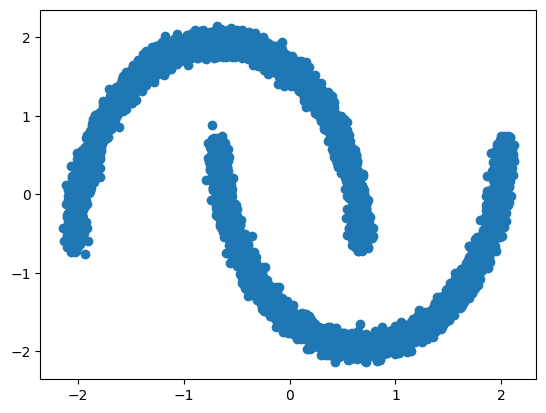

In [34]:
plt.scatter(mock_data[:, 0], mock_data[:, 1])

<AxesSubplot: xlabel='a', ylabel='b'>

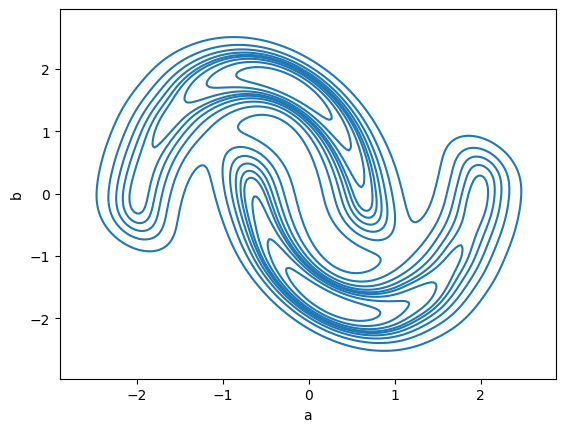

In [35]:
sns.kdeplot(data=md_df, x='a', y='b')

In [36]:
model(mock_data[0]).shape

torch.Size([1, 1, 1, 1])

In [37]:
criterion(model, mock_data[0])

tensor([[[[84709.8203]]]], grad_fn=<AddBackward0>)

In [38]:
from sklearn.utils import shuffle

In [39]:
losses = []

In [40]:

epochs = 20
batch_size = 100
loss = 0

for i in tqdm.tqdm(range(epochs)):
    cum_losses = []
    loss = 0
    for j, sample in enumerate(shuffle(mock_data)):
        
        loss += criterion(model, sample)
        
        #print(loss)
        
        if j % batch_size == 0:
            loss_fin = loss
            #print(loss)
            
            loss_fin.backward()
            
            cum_losses.append(loss_fin.detach().numpy())
            
            loss = 0
            optimizer.step()
            optimizer.zero_grad()
    
    losses.append(np.mean(cum_losses) / batch_size)

100%|██████████| 20/20 [11:36<00:00, 34.84s/it]


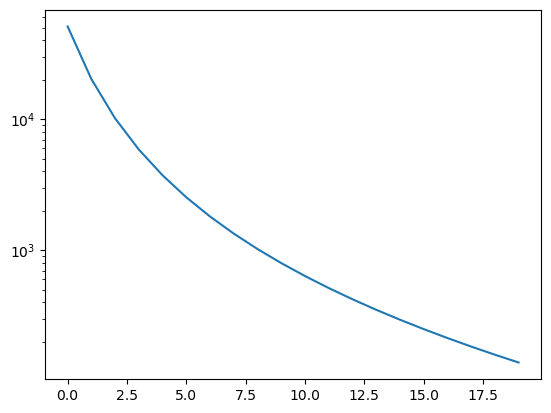

In [41]:
plt.plot(losses[:])
plt.yscale('log')

In [42]:
ls = 0
nm_test = 100
for i in range(nm_test):
    ls += criterion(model, mock_data[i], debug=False)
print(ls/nm_test)

tensor([[[[130.6836]]]], grad_fn=<DivBackward0>)


In [48]:
model(mock_data[6]), mock_data[6]

(tensor([[[[8.6300]]]], grad_fn=<ViewBackward0>),
 array([0.02922516, 1.49160034]))

In [49]:
from itertools import product

In [50]:
grid = product(np.linspace(-np.pi, np.pi, num = 100), np.linspace(-np.pi, np.pi, num = 100))

In [51]:
nm = 30
ans_list = np.zeros(shape=(nm, nm))
for i, valx in enumerate(np.linspace(-np.pi, np.pi, num = nm)):
    for j, valy in enumerate(np.linspace(-np.pi, np.pi, num = nm)):
        ans_list[i][j] = model(np.array([valx, valy]))#, 0, 0, 0, 0, 0, 0]))

<AxesSubplot: >

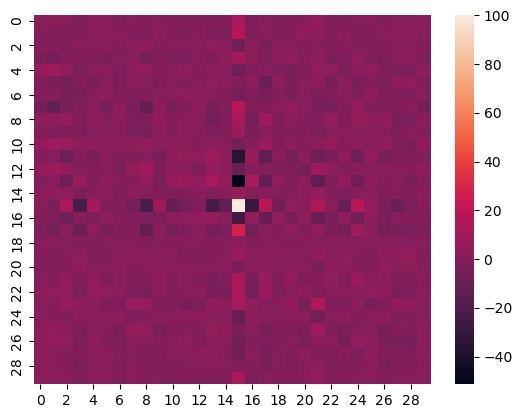

In [52]:

sns.heatmap(ans_list)